In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.wkt import loads
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression


In [ ]:
Mad2 = pd.read_csv("mad2.csv")
Mad2

,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,CADMAXBUILDINGFLOOR,CADASTRALQUALITYID,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_STREET,BARRIO_NUM
0,180848,47,1,1,1,1,0,1,1,1,1,7,3.0,8.058429,6.868677,54.0
1,321621,54,1,1,0,0,0,0,1,0,0,5,3.0,0.876369,1.544125,83.0
2,510488,75,2,1,0,1,0,1,1,0,0,6,3.0,0.907479,1.608444,83.0
3,388682,48,1,1,1,1,0,0,0,0,0,9,5.0,0.845462,1.516166,83.0
4,312041,50,0,1,0,0,0,0,0,0,0,5,7.0,1.250231,1.794136,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90236,449781,115,3,2,1,1,1,1,1,1,0,7,3.0,10.003059,8.276950,52.0
90237,403118,93,2,2,1,1,1,1,1,1,0,7,3.0,10.198147,8.496364,52.0
90238,443300,121,2,2,1,1,1,1,1,1,0,6,3.0,11.204027,9.573127,52.0
90239,189245,62,3,1,0,0,0,0,1,0,0,4,5.0,8.780692,6.941217,52.0


In [ ]:
X = Mad2.drop(["PRICE"], axis=1)
y = Mad2["PRICE"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72192, 15), (18049, 15), (72192,), (18049,))

#Random Forest

#Modelo inicial

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1

)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Resultados en el conjunto de prueba:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

y_train_pred = rf_model.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("Resultados en el conjunto de entrenamiento:")
print(f"Train MAE: {mae_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R²: {r2_train:.4f}")


Resultados en el conjunto de prueba:
MAE: 54324.38
RMSE: 102727.13
R²: 0.9355
Resultados en el conjunto de entrenamiento:
Train MAE: 20242.99
Train RMSE: 37712.39
Train R²: 0.9911


Fitting 3 folds for each of 16 candidates, totalling 48 fits


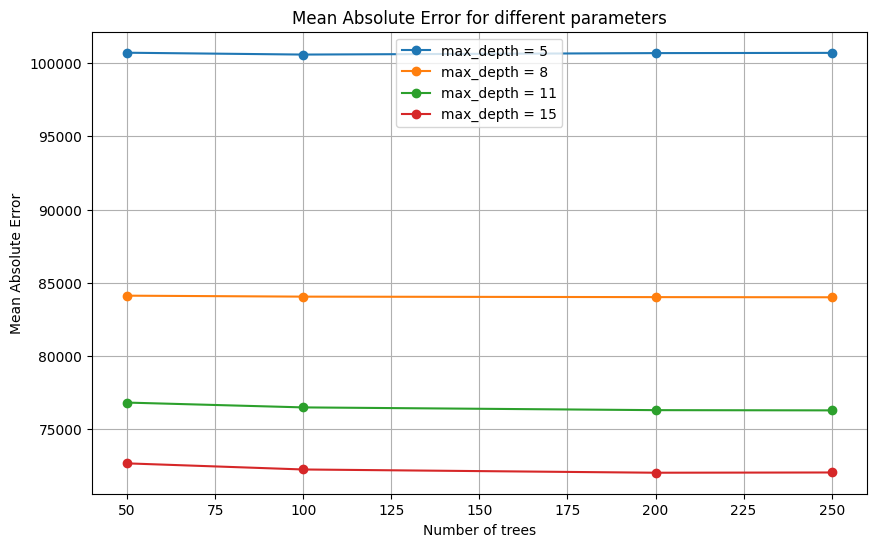

Mejores parámetros encontrados:
{'max_depth': 15, 'n_estimators': 200}
MAE final en conjunto de prueba: 69777.16


In [ ]:
from sklearn.model_selection import GridSearchCV

Mad2 = pd.read_csv("mad2.csv")

Mad2_sample = Mad2.sample(n=30000, random_state=42)

X = Mad2_sample.drop(["PRICE"], axis=1)
y = Mad2_sample["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    "n_estimators": [50, 100, 200, 250],
    "max_depth": [5, 8, 11, 15]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)

results["mean_test_mae"] = -results["mean_test_score"]

plt.figure(figsize=(10, 6))

for depth in param_grid["max_depth"]:
    subset = results[results["param_max_depth"] == depth]
    plt.plot(subset["param_n_estimators"], subset["mean_test_mae"], marker='o', linestyle='-', label=f"max_depth = {depth}")

plt.xlabel("Number of trees")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error for different parameters")
plt.legend()
plt.grid()
plt.show()

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
mae_final = mean_absolute_error(y_test, y_pred)
print(f"MAE final en conjunto de prueba: {mae_final:.2f}")


#Modelo final

In [ ]:
Mad2 = pd.read_csv("mad2.csv")
Mad2

,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,CADMAXBUILDINGFLOOR,CADASTRALQUALITYID,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_STREET,BARRIO_NUM
0,180848,47,1,1,1,1,0,1,1,1,1,7,3.0,8.058429,6.868677,54.0
1,321621,54,1,1,0,0,0,0,1,0,0,5,3.0,0.876369,1.544125,83.0
2,510488,75,2,1,0,1,0,1,1,0,0,6,3.0,0.907479,1.608444,83.0
3,388682,48,1,1,1,1,0,0,0,0,0,9,5.0,0.845462,1.516166,83.0
4,312041,50,0,1,0,0,0,0,0,0,0,5,7.0,1.250231,1.794136,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90236,449781,115,3,2,1,1,1,1,1,1,0,7,3.0,10.003059,8.276950,52.0
90237,403118,93,2,2,1,1,1,1,1,1,0,7,3.0,10.198147,8.496364,52.0
90238,443300,121,2,2,1,1,1,1,1,1,0,6,3.0,11.204027,9.573127,52.0
90239,189245,62,3,1,0,0,0,0,1,0,0,4,5.0,8.780692,6.941217,52.0


In [ ]:
X = Mad2.drop(["PRICE","HASBOXROOM", "HASWARDROBE", "HASPARKINGSPACE", "HASAIRCONDITIONING", "HASSWIMMINGPOOL"], axis=1)
y = Mad2["PRICE"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72192, 10), (18049, 10), (72192,), (18049,))

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    min_samples_split=25,
    min_samples_leaf=35,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Resultados en el conjunto de prueba:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

y_train_pred = rf_model.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("Resultados en el conjunto de entrenamiento:")
print(f"Train MAE: {mae_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R²: {r2_train:.4f}")


Resultados en el conjunto de prueba:
MAE: 80079.36
RMSE: 136784.82
R²: 0.8857
Resultados en el conjunto de entrenamiento:
Train MAE: 76974.02
Train RMSE: 128351.45
Train R²: 0.8971


In [ ]:
feature_importances_rf = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": rf_model.feature_importances_}
).sort_values(by="Importance", ascending=False)


print(feature_importances_rf.to_string(float_format='{:f}'.format))



                    Feature  Importance
0           CONSTRUCTEDAREA    0.349754
14               BARRIO_NUM    0.205665
2                BATHNUMBER    0.162164
13       DISTANCE_TO_STREET    0.056817
11       CADASTRALQUALITYID    0.051009
1                ROOMNUMBER    0.048258
12  DISTANCE_TO_CITY_CENTER    0.046595
3                   HASLIFT    0.034434
9                HASDOORMAN    0.015638
10      CADMAXBUILDINGFLOOR    0.011411
8           HASSWIMMINGPOOL    0.005075
5           HASPARKINGSPACE    0.004164
6                HASBOXROOM    0.003621
4        HASAIRCONDITIONING    0.003321
7               HASWARDROBE    0.002074


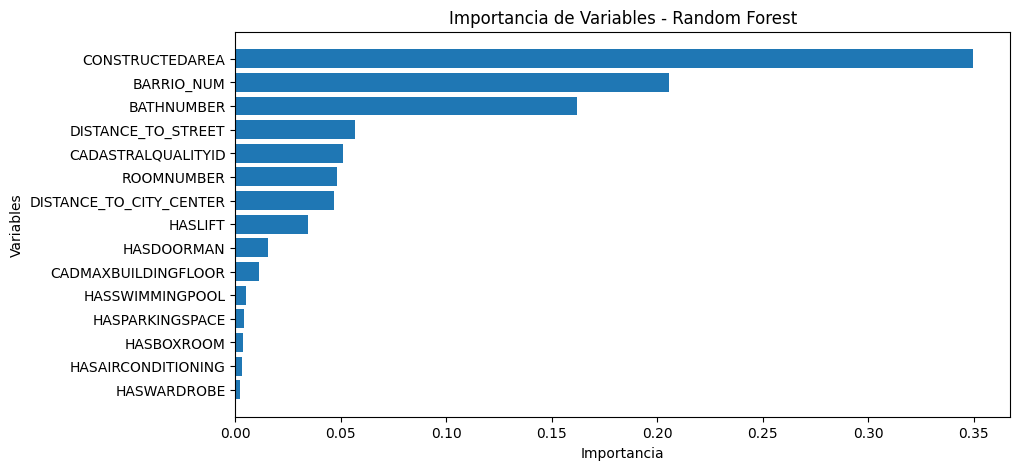

In [ ]:
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,5))
plt.barh(feature_importance_df['Variable'], feature_importance_df['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de Variables - Random Forest')
plt.gca().invert_yaxis()
plt.show()


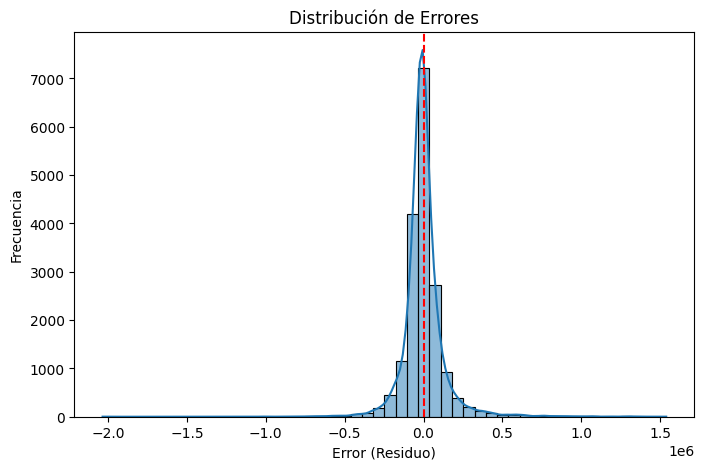

In [ ]:
errors1 = y_test - rf_model.predict(X_test)

plt.figure(figsize=(8,5))
sns.histplot(errors1, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")
plt.show()


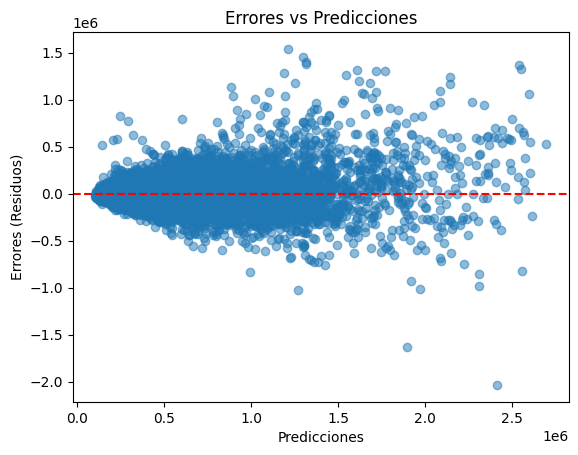

In [ ]:
plt.scatter(rf_model.predict(X_test), errors1, alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Predicciones")
plt.ylabel("Errores (Residuos)")
plt.title("Errores vs Predicciones")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

rf_model_cv = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    min_samples_split=25,
    min_samples_leaf=35,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

cv_scores = cross_val_score(rf_model_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

rmse_scores = (-cv_scores) ** 0.5

print("Validación Cruzada (5-Fold):")
print(f"RMSE por fold: {rmse_scores}")
print(f"RMSE promedio: {rmse_scores.mean():.2f}")
print(f"Desviación estándar: {rmse_scores.std():.2f}")


Validación Cruzada (5-Fold):
RMSE por fold: [132792.45236381 135508.97995533 135842.86365841 138535.56071806
 135579.49876111]
RMSE promedio: 135651.87
Desviación estándar: 1819.56


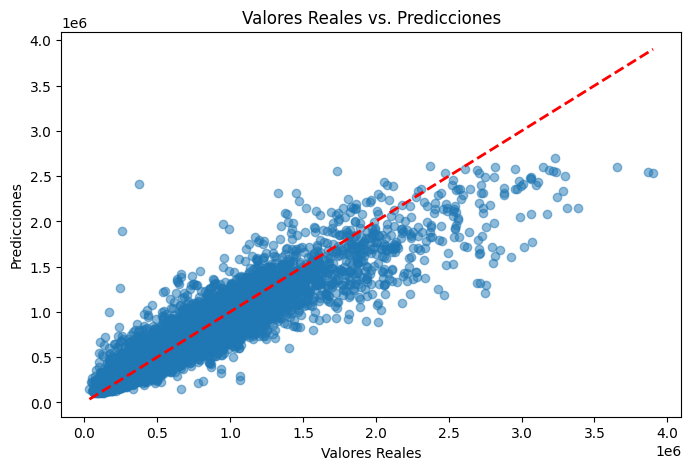

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, rf_model.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.show()


In [ ]:
num_muestras = 5
muestras_idx = np.random.choice(len(X_test), num_muestras, replace=False)

y_real_muestras = y_test.iloc[muestras_idx].values
y_pred_muestras = rf_model.predict(X_test.iloc[muestras_idx])

print("Sample Predictions:")
for i in range(num_muestras):
    print(f" - Random Forest: Predicted: {y_pred_muestras[i]:,.2f}, Actual: {y_real_muestras[i]:,.2f}")


Sample Predictions:
 - Random Forest: Predicted: 208,020.99, Actual: 118,632.00
 - Random Forest: Predicted: 732,315.37, Actual: 708,834.00
 - Random Forest: Predicted: 604,027.95, Actual: 576,181.00
 - Random Forest: Predicted: 469,202.79, Actual: 732,090.00
 - Random Forest: Predicted: 487,192.24, Actual: 418,293.00


#XGBoost

In [ ]:
Mad2 = pd.read_csv("mad2.csv")
Mad2

,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,CADMAXBUILDINGFLOOR,CADASTRALQUALITYID,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_STREET,BARRIO_NUM
0,180848,47,1,1,1,1,0,1,1,1,1,7,3.0,8.058429,6.868677,54.0
1,321621,54,1,1,0,0,0,0,1,0,0,5,3.0,0.876369,1.544125,83.0
2,510488,75,2,1,0,1,0,1,1,0,0,6,3.0,0.907479,1.608444,83.0
3,388682,48,1,1,1,1,0,0,0,0,0,9,5.0,0.845462,1.516166,83.0
4,312041,50,0,1,0,0,0,0,0,0,0,5,7.0,1.250231,1.794136,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90236,449781,115,3,2,1,1,1,1,1,1,0,7,3.0,10.003059,8.276950,52.0
90237,403118,93,2,2,1,1,1,1,1,1,0,7,3.0,10.198147,8.496364,52.0
90238,443300,121,2,2,1,1,1,1,1,1,0,6,3.0,11.204027,9.573127,52.0
90239,189245,62,3,1,0,0,0,0,1,0,0,4,5.0,8.780692,6.941217,52.0


In [ ]:
X = Mad2.drop(["PRICE"], axis=1)
y = Mad2["PRICE"]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72192, 15), (18049, 15), (72192,), (18049,))

#Modelo inicial

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    learning_rate=0.3,
    reg_alpha=0,
    reg_lambda=1,
    subsample=1,
    colsample_bytree=1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Resultados en el conjunto de prueba:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R²: {r2_xgb:.4f}")

y_train_pred_xgb = xgb_model.predict(X_train)

mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

print("Resultados en el conjunto de entrenamiento:")
print(f"Train MAE: {mae_train_xgb:.2f}")
print(f"Train RMSE: {rmse_train_xgb:.2f}")
print(f"Train R²: {r2_train_xgb:.4f}")


Resultados en el conjunto de prueba:
MAE: 67694.20
RMSE: 115822.07
R²: 0.9180
Resultados en el conjunto de entrenamiento:
Train MAE: 58877.43
Train RMSE: 90177.78
Train R²: 0.9492


#Modelo final

In [ ]:
Mad2 = pd.read_csv("mad2.csv")
Mad2

,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,CADMAXBUILDINGFLOOR,CADASTRALQUALITYID,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_STREET,BARRIO_NUM
0,180848,47,1,1,1,1,0,1,1,1,1,7,3.0,8.058429,6.868677,54.0
1,321621,54,1,1,0,0,0,0,1,0,0,5,3.0,0.876369,1.544125,83.0
2,510488,75,2,1,0,1,0,1,1,0,0,6,3.0,0.907479,1.608444,83.0
3,388682,48,1,1,1,1,0,0,0,0,0,9,5.0,0.845462,1.516166,83.0
4,312041,50,0,1,0,0,0,0,0,0,0,5,7.0,1.250231,1.794136,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56721,387158,55,1,1,1,0,0,1,0,1,1,5,4.0,5.736724,1.441690,113.0
56722,953005,160,4,3,1,1,1,1,1,0,1,5,5.0,6.037061,1.677431,113.0
56723,1283308,200,5,3,1,0,0,0,0,0,1,9,4.0,5.412449,0.158186,113.0
56724,1180426,138,3,2,1,1,1,0,1,0,0,8,4.0,5.151508,0.757293,108.0


In [ ]:
X = Mad2.drop(["PRICE", "CADMAXBUILDINGFLOOR", "HASWARDROBE"], axis=1)
y = Mad2["PRICE"]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45380, 13), (11346, 13), (45380,), (11346,))

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=600,
    max_depth=4,
    min_child_weight=25,
    gamma=0.5,
    learning_rate=0.03,
    reg_alpha=0.5,
    reg_lambda=3.0,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Resultados en el conjunto de prueba:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R²: {r2_xgb:.4f}")

y_train_pred_xgb = xgb_model.predict(X_train)

mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

print("Resultados en el conjunto de entrenamiento:")
print(f"Train MAE: {mae_train_xgb:.2f}")
print(f"Train RMSE: {rmse_train_xgb:.2f}")
print(f"Train R²: {r2_train_xgb:.4f}")


Resultados en el conjunto de prueba:
MAE: 83203.31
RMSE: 134035.63
R²: 0.8992
Resultados en el conjunto de entrenamiento:
Train MAE: 81166.07
Train RMSE: 130393.22
Train R²: 0.9092


In [ ]:
feature_importances = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": xgb_model.feature_importances_}
).sort_values(by="Importance", ascending=False)

print(feature_importances.to_string(float_format='{:f}'.format))

                    Feature  Importance
0           CONSTRUCTEDAREA    0.307520
2                BATHNUMBER    0.285193
14               BARRIO_NUM    0.145189
3                   HASLIFT    0.042694
11       CADASTRALQUALITYID    0.035982
13       DISTANCE_TO_STREET    0.031241
12  DISTANCE_TO_CITY_CENTER    0.029089
8           HASSWIMMINGPOOL    0.025924
1                ROOMNUMBER    0.025196
5           HASPARKINGSPACE    0.016037
4        HASAIRCONDITIONING    0.016017
9                HASDOORMAN    0.015383
6                HASBOXROOM    0.011107
10      CADMAXBUILDINGFLOOR    0.007652
7               HASWARDROBE    0.005777


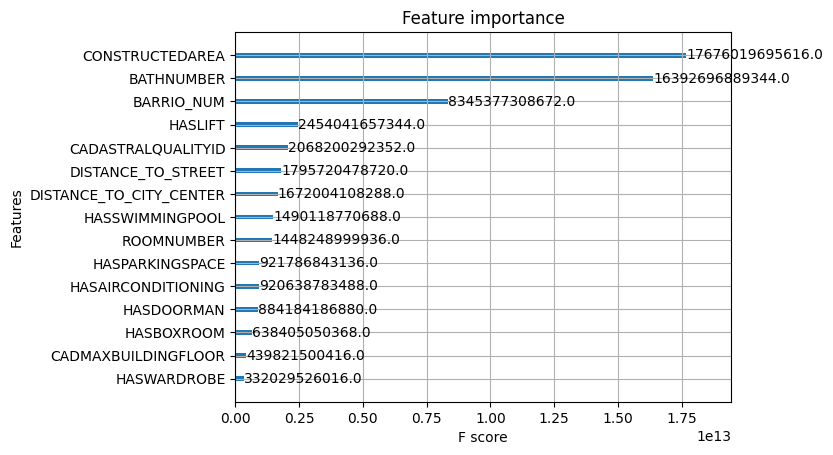

In [ ]:
from xgboost import plot_importance

plot_importance(xgb_model, importance_type="gain")
plt.show()

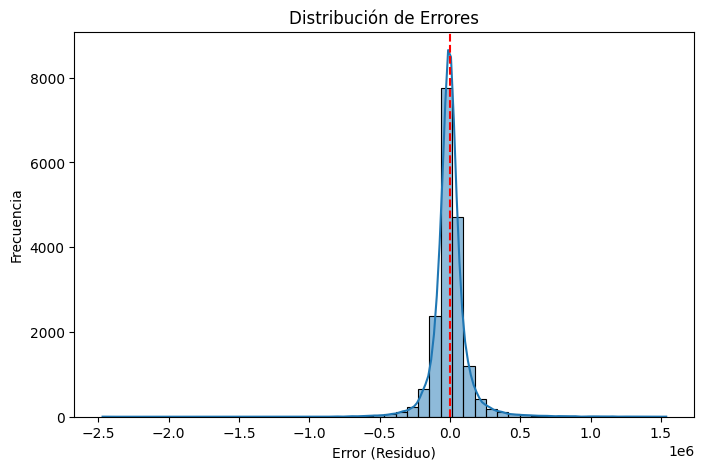

In [ ]:
errors2 = y_test - xgb_model.predict(X_test)

plt.figure(figsize=(8,5))
sns.histplot(errors2, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")
plt.show()


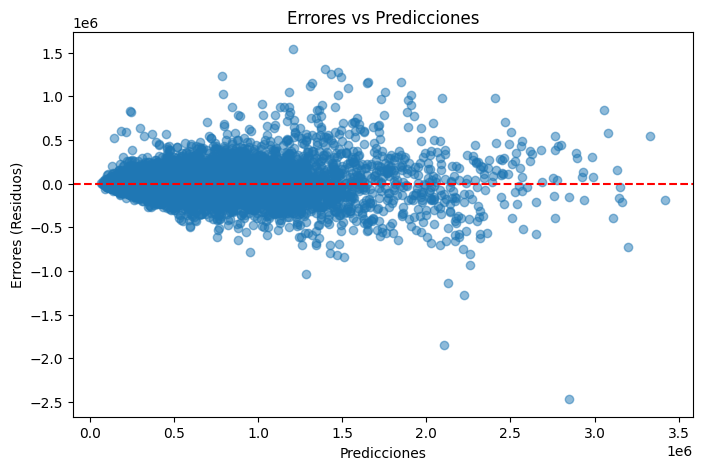

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(xgb_model.predict(X_test), errors2, alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Predicciones")
plt.ylabel("Errores (Residuos)")
plt.title("Errores vs Predicciones")
plt.show()



In [ ]:
from sklearn.model_selection import cross_val_score

xgb_model = XGBRegressor(
    n_estimators=600,
    max_depth=4,
    learning_rate=0.03,
    subsample=0.7,
    colsample_bytree=0.7,
    min_child_weight=25,
    reg_alpha=0.5,
    reg_lambda=3.0,
    gamma=0.5,
    random_state=42
)

cv_scores = cross_val_score(xgb_model_cv, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_scores = (-cv_scores) ** 0.5

print("Validación Cruzada (5-Fold):")
print(f"RMSE por fold: {rmse_scores}")
print(f"RMSE promedio: {rmse_scores.mean():.2f}")
print(f"Desviación estándar: {rmse_scores.std():.2f}")


Validación Cruzada (5-Fold):
RMSE por fold: [135581.23952819 133180.44781423 154118.558      117356.06373767
  85730.21572351]
RMSE promedio: 125193.30
Desviación estándar: 22922.18


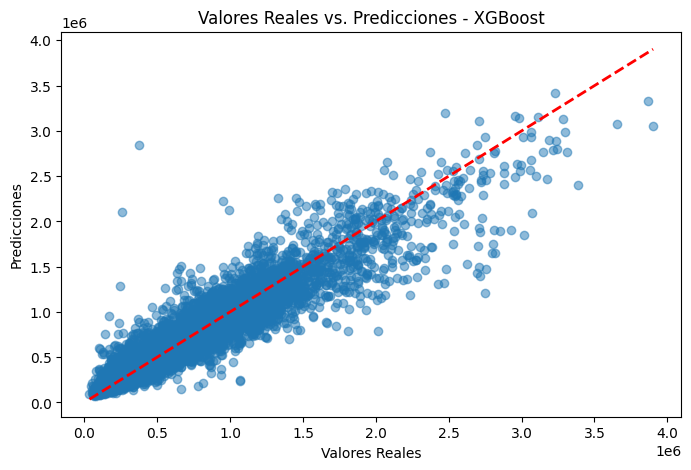

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, xgb_model.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones - XGBoost")
plt.show()


In [ ]:
num_muestras = 5
muestras_idx = np.random.choice(len(X_test), num_muestras, replace=False)

y_real_muestras = y_test.iloc[muestras_idx].values
y_pred_muestras = xgb_model.predict(X_test.iloc[muestras_idx])


print("Sample Predictions - XGBoost:")
for i in range(num_muestras):
    print(f" - XGBoost: Predicted: {y_pred_muestras[i]:,.2f}, Actual: {y_real_muestras[i]:,.2f}")


Sample Predictions - XGBoost:
 - XGBoost: Predicted: 452,747.34, Actual: 515,613.00
 - XGBoost: Predicted: 394,109.81, Actual: 418,065.00
 - XGBoost: Predicted: 219,140.69, Actual: 289,762.00
 - XGBoost: Predicted: 1,121,838.25, Actual: 1,400,078.00
 - XGBoost: Predicted: 254,390.70, Actual: 524,787.00


#Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
Mad1 = pd.read_csv("mad1.csv")
Mad1

,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,HASLIFT,HASDOORMAN,CADASTRALQUALITYID,DISTANCE_TO_STREET,BARRIO_NUM
0,180848,47,1,1,1,3.0,6.868677,54.0
1,321621,54,1,0,0,3.0,1.544125,83.0
2,510488,75,2,0,0,3.0,1.608444,83.0
3,388682,48,1,1,0,5.0,1.516166,83.0
4,312041,50,0,0,0,7.0,1.794136,83.0
...,...,...,...,...,...,...,...,...
90236,449781,115,3,1,0,3.0,8.276950,52.0
90237,403118,93,2,1,0,3.0,8.496364,52.0
90238,443300,121,2,1,0,3.0,9.573127,52.0
90239,189245,62,3,0,0,5.0,6.941217,52.0


In [ ]:
X = Mad1.drop(["PRICE"], axis=1)
y = Mad1["PRICE"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72192, 7), (18049, 7), (72192,), (18049,))

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Resultados en el conjunto de prueba:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.4f}")

y_train_pred_lr = lr_model.predict(X_train)

mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
r2_train_lr = r2_score(y_train, y_train_pred_lr)

print("Resultados en el conjunto de entrenamiento:")
print(f"Train MAE: {mae_train_lr:.2f}")
print(f"Train RMSE: {rmse_train_lr:.2f}")
print(f"Train R²: {r2_train_lr:.4f}")


Resultados en el conjunto de prueba:
MAE: 121793.91
RMSE: 192490.13
R²: 0.7736
Resultados en el conjunto de entrenamiento:
Train MAE: 122377.11
Train RMSE: 192025.18
Train R²: 0.7697


In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("Factor de Inflación de la Varianza (VIF):")
print(vif_data)
if vif_data["VIF"].max() > 10:
    print("Se detecta colinealidad entre las variables (VIF > 10).")
else:
    print("No hay colinealidad significativa entre las variables.")


Factor de Inflación de la Varianza (VIF):
             Variable        VIF
0     CONSTRUCTEDAREA  12.768836
1          ROOMNUMBER  12.408619
2             HASLIFT   4.005009
3          HASDOORMAN   1.645169
4  CADASTRALQUALITYID   6.765141
5  DISTANCE_TO_STREET   3.167394
6          BARRIO_NUM   5.771010
Se detecta colinealidad entre las variables (VIF > 10).


In [ ]:
Mad1 = pd.read_csv("mad1.csv")
Mad1

,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,HASLIFT,HASDOORMAN,CADASTRALQUALITYID,DISTANCE_TO_STREET,BARRIO_NUM
0,180848,47,1,1,1,3.0,6.868677,54.0
1,321621,54,1,0,0,3.0,1.544125,83.0
2,510488,75,2,0,0,3.0,1.608444,83.0
3,388682,48,1,1,0,5.0,1.516166,83.0
4,312041,50,0,0,0,7.0,1.794136,83.0
...,...,...,...,...,...,...,...,...
90236,449781,115,3,1,0,3.0,8.276950,52.0
90237,403118,93,2,1,0,3.0,8.496364,52.0
90238,443300,121,2,1,0,3.0,9.573127,52.0
90239,189245,62,3,0,0,5.0,6.941217,52.0


In [ ]:
X = Mad1.drop(["PRICE", "ROOMNUMBER"], axis=1)
y = Mad1["PRICE"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72192, 6), (18049, 6), (72192,), (18049,))

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Resultados en el conjunto de prueba:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.4f}")

y_train_pred_lr = lr_model.predict(X_train)

mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
r2_train_lr = r2_score(y_train, y_train_pred_lr)

print("Resultados en el conjunto de entrenamiento:")
print(f"Train MAE: {mae_train_lr:.2f}")
print(f"Train RMSE: {rmse_train_lr:.2f}")
print(f"Train R²: {r2_train_lr:.4f}")


Resultados en el conjunto de prueba:
MAE: 122698.06
RMSE: 193760.50
R²: 0.7706
Resultados en el conjunto de entrenamiento:
Train MAE: 123508.24
Train RMSE: 193581.09
Train R²: 0.7660


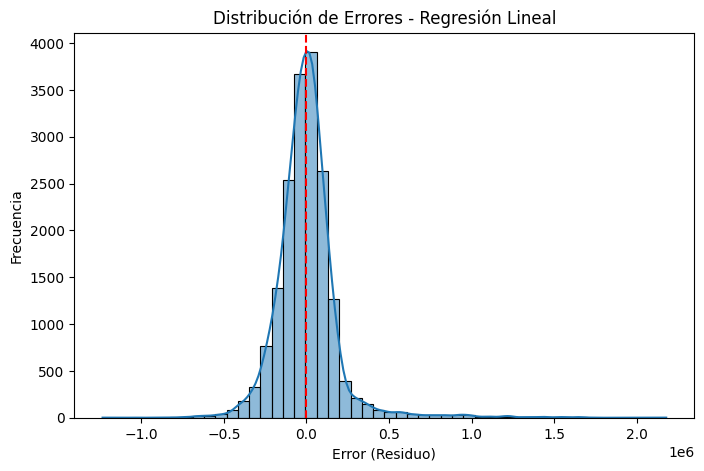

In [ ]:
errors3 = y_test - y_pred_lr

plt.figure(figsize=(8, 5))
sns.histplot(errors3, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores - Regresión Lineal")
plt.show()


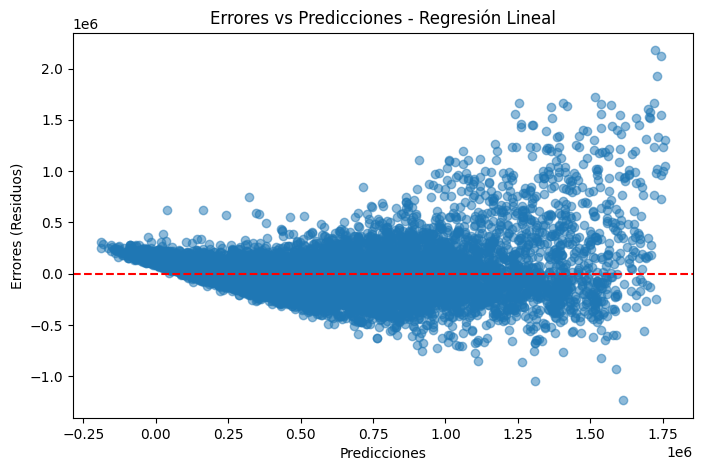

In [ ]:
errors4 = y_test - lr_model.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(lr_model.predict(X_test), errors4, alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Predicciones")
plt.ylabel("Errores (Residuos)")
plt.title("Errores vs Predicciones - Regresión Lineal")
plt.show()


In [ ]:
from statsmodels.stats.stattools import durbin_watson


dw_stat = durbin_watson(y_test - y_pred_lr)

print(f"Durbin-Watson: {dw_stat:.4f}")


NameError: name 'durbin_watson' is not defined

In [ ]:
from scipy.stats import shapiro


residuos = y_test - y_pred_lr


stat, p_value = shapiro(residuos)


print(f"Test de Shapiro-Wilk: p-valor = {p_value:.4f}")

if p_value < 0.05:
    print("Los residuos no siguen una distribución normal (rechazamos H0).")
else:
    print("Los residuos siguen una distribución normal (no rechazamos H0).")


Test de Shapiro-Wilk: p-valor = 0.0000
Los residuos NO siguen una distribución normal (rechazamos H0).


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18049.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from statsmodels.api import add_constant

X_with_const = add_constant(X_test)
bp_stat, bp_p_value, _, _ = het_breuschpagan(residuos, X_with_const)


print(f"Test de Breusch-Pagan: p-valor = {bp_p_value:.4f}")
if bp_p_value < 0.05:
    print("Los residuos presentan heterocedasticidad (rechazamos H0).")
else:
    print("Los residuos presentan homocedasticidad (no rechazamos H0).")

Test de Breusch-Pagan: p-valor = 0.0000
Los residuos presentan heterocedasticidad (rechazamos H0).


In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("Factor de Inflación de la Varianza (VIF):")
print(vif_data)
if vif_data["VIF"].max() > 10:
    print("Se detecta colinealidad entre las variables (VIF > 10).")
else:
    print("No hay colinealidad significativa entre las variables.")


Factor de Inflación de la Varianza (VIF):
             Variable       VIF
0     CONSTRUCTEDAREA  6.286174
1             HASLIFT  4.004386
2          HASDOORMAN  1.644526
3  CADASTRALQUALITYID  5.557255
4  DISTANCE_TO_STREET  3.153962
5          BARRIO_NUM  5.724164
No hay colinealidad significativa entre las variables.


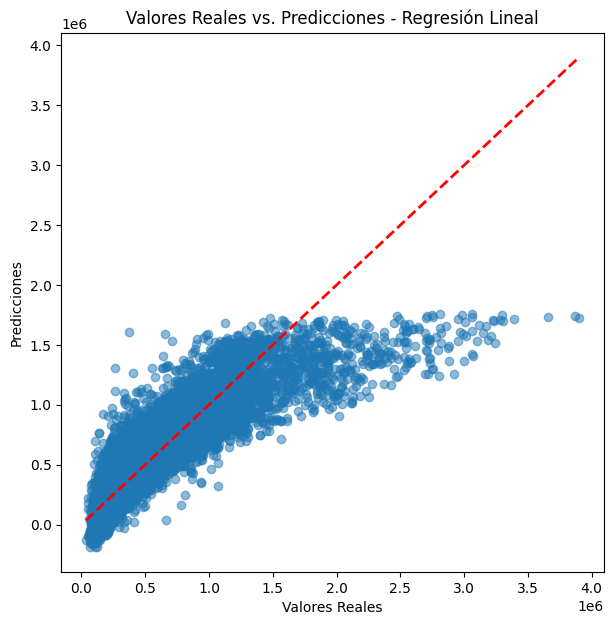

In [ ]:
y_pred_lr = lr_model.predict(X_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones - Regresión Lineal")
plt.show()


In [ ]:
y_log = np.log(y)

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train_log)

y_pred_log_lr = lr_model.predict(X_test)

y_pred_lr = np.exp(y_pred_log_lr)

mae_lr = mean_absolute_error(np.exp(y_test_log), y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(np.exp(y_test_log), y_pred_lr))
r2_lr = r2_score(np.exp(y_test_log), y_pred_lr)

print("Resultados en el conjunto de prueba:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.4f}")

y_train_pred_log_lr = lr_model.predict(X_train)

y_train_pred_lr = np.exp(y_train_pred_log_lr)

mae_train_lr = mean_absolute_error(np.exp(y_train_log), y_train_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(np.exp(y_train_log), y_train_pred_lr))
r2_train_lr = r2_score(np.exp(y_train_log), y_train_pred_lr)

print("Resultados en el conjunto de entrenamiento:")
print(f"Train MAE: {mae_train_lr:.2f}")
print(f"Train RMSE: {rmse_train_lr:.2f}")
print(f"Train R²: {r2_train_lr:.4f}")


Resultados en el conjunto de prueba:
MAE: 105417.60
RMSE: 178880.63
R²: 0.8045
Resultados en el conjunto de entrenamiento:
Train MAE: 104826.62
Train RMSE: 177314.03
Train R²: 0.8037


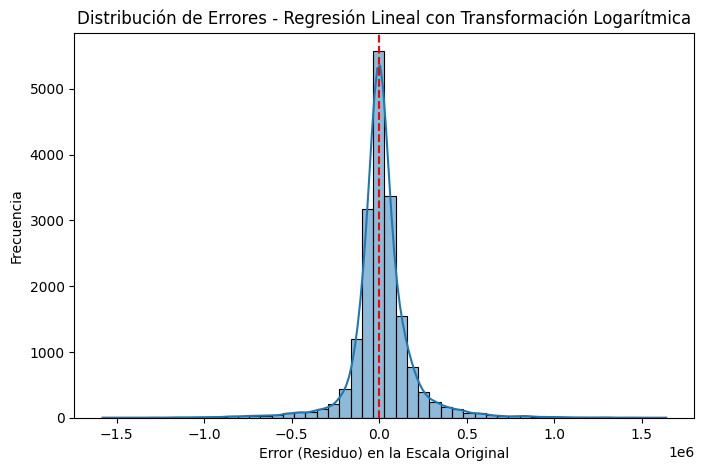

In [ ]:
errors_log = np.exp(y_test_log) - y_pred_lr

plt.figure(figsize=(8, 5))
sns.histplot(errors_log, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error (Residuo) en la Escala Original")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores - Regresión Lineal con Transformación Logarítmica")
plt.show()


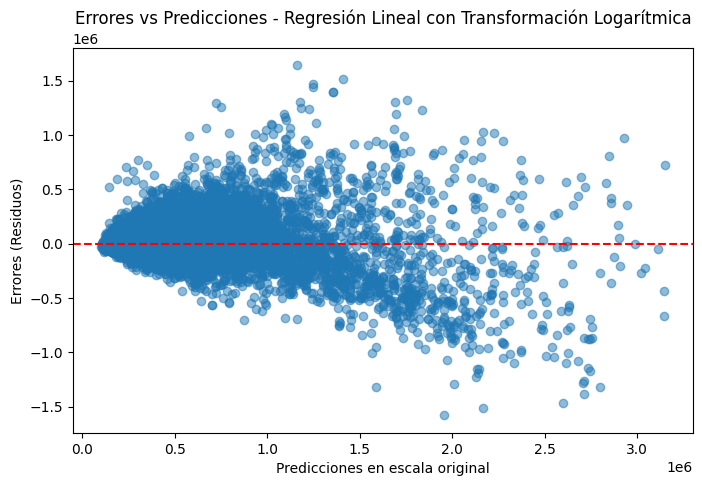

In [ ]:
y_pred_log_lr = lr_model.predict(X_test)
y_pred_lr = np.exp(y_pred_log_lr)

errors4 = np.exp(y_test_log) - y_pred_lr

plt.figure(figsize=(8,5))
plt.scatter(y_pred_lr, errors4, alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Predicciones en escala original")
plt.ylabel("Errores (Residuos)")
plt.title("Errores vs Predicciones - Regresión Lineal con Transformación Logarítmica")
plt.show()


In [ ]:
from statsmodels.stats.stattools import durbin_watson

errors_log = np.exp(y_test_log) - y_pred_lr

dw_stat = durbin_watson(errors_log)
print(f"Durbin-Watson: {dw_stat:.4f}")


Durbin-Watson: 1.9808


In [ ]:
from scipy.stats import shapiro

residuos_log = np.exp(y_test_log) - y_pred_lr

stat, p_value = shapiro(residuos_log)

print(f"Test de Shapiro-Wilk: p-valor = {p_value:.4f}")

if p_value < 0.05:
    print("Los residuos NO siguen una distribución normal (rechazamos H0).")
else:
    print("Los residuos siguen una distribución normal (no rechazamos H0).")


Test de Shapiro-Wilk: p-valor = 0.0000
Los residuos NO siguen una distribución normal (rechazamos H0).


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18049.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from statsmodels.api import add_constant
from statsmodels.stats.diagnostic import het_breuschpagan

residuos_log = np.exp(y_test_log) - y_pred_lr

X_with_const = add_constant(X_test)

bp_stat, bp_p_value, _, _ = het_breuschpagan(residuos_log, X_with_const)

print(f"Test de Breusch-Pagan: p-valor = {bp_p_value:.4f}")

if bp_p_value < 0.05:
    print("Los residuos presentan heterocedasticidad (rechazamos H0).")
else:
    print("Los residuos presentan homocedasticidad (no rechazamos H0).")

Test de Breusch-Pagan: p-valor = 0.0000
Los residuos presentan heterocedasticidad (rechazamos H0).


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("Factor de Inflación de la Varianza (VIF):")
print(vif_data)

if vif_data["VIF"].max() > 10:
    print("Se detecta colinealidad entre las variables (VIF > 10).")
else:
    print("No hay colinealidad significativa entre las variables.")


Factor de Inflación de la Varianza (VIF):
             Variable       VIF
0     CONSTRUCTEDAREA  6.286174
1             HASLIFT  4.004386
2          HASDOORMAN  1.644526
3  CADASTRALQUALITYID  5.557255
4  DISTANCE_TO_STREET  3.153962
5          BARRIO_NUM  5.724164
No hay colinealidad significativa entre las variables.


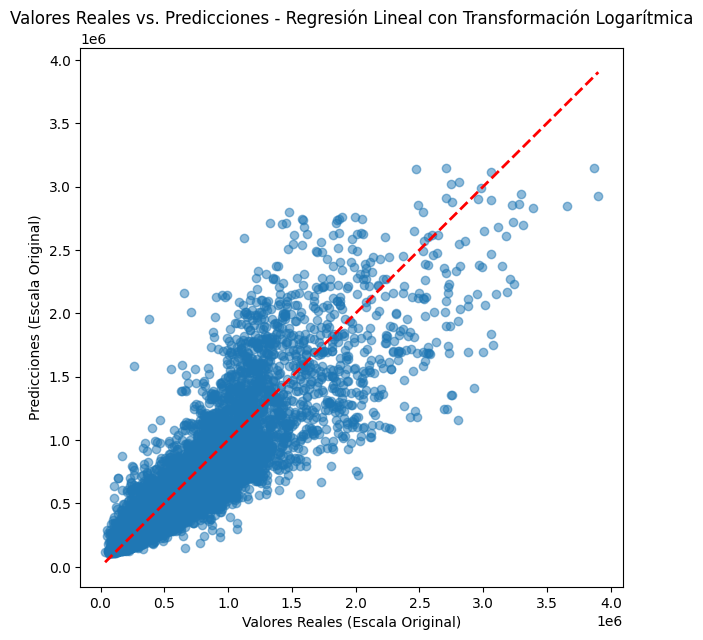

In [ ]:
y_pred_log_lr = lr_model.predict(X_test)

y_pred_lr = np.exp(y_pred_log_lr)
y_test_original = np.exp(y_test_log)

plt.figure(figsize=(7,7))
plt.scatter(y_test_original, y_pred_lr, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         '--r', linewidth=2)

plt.xlabel("Valores Reales (Escala Original)")
plt.ylabel("Predicciones (Escala Original)")
plt.title("Valores Reales vs. Predicciones - Regresión Lineal con Transformación Logarítmica")
plt.show()
